<a href="https://colab.research.google.com/github/himalayahall/DATA608/blob/main/Story%201/Story1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
funding_ds = pd.read_csv("https://raw.githubusercontent.com/himalayahall/DATA608/main/Story%201/IIJA%20FUNDING%20AS%20OF%20MARCH%202023.csv")
funding_ds.head(n=10)

,"State, Teritory or Tribal Nation",Total (Billions)
0,ALABAMA,3.0000
1,ALASKA,3.7000
2,AMERICAN SAMOA,0.0686
3,ARIZONA,3.5000
4,ARKANSAS,2.8000
5,CALIFORNIA,18.4000
6,COLORADO,3.2000
7,CONNECTICUT,2.5000
8,DELEWARE,0.7920
9,DISTRICT OF COLUMBIA,1.1000


In [8]:
funding_ds.dtypes

State, Teritory or Tribal Nation     object
Total (Billions)                    float64
dtype: object

In [9]:
funding_ds.rename(columns={"State, Teritory or Tribal Nation": "STATE", "Total (Billions)": "FUNDING"}, inplace=True)
funding_ds = funding_ds.astype({'STATE' : 'string'})
funding_ds.dtypes

STATE       string
FUNDING    float64
dtype: object

In [10]:
funding_ds = funding_ds[funding_ds['STATE'] != 'AMERICAN SAMOA']
funding_ds.head(n=10)

,STATE,FUNDING
0,ALABAMA,3.000
1,ALASKA,3.700
3,ARIZONA,3.500
4,ARKANSAS,2.800
5,CALIFORNIA,18.400
6,COLORADO,3.200
7,CONNECTICUT,2.500
8,DELEWARE,0.792
9,DISTRICT OF COLUMBIA,1.100
10,FLORIDA,8.200


In [11]:
election2020_ds = pd.read_csv("https://raw.githubusercontent.com/himalayahall/DATA608/main/Story%201/2020_Presidential_Elections.csv", skip_blank_lines=True)
election2020_ds.head(n = 5)

,STATE,BIDEN,TRUMP
0,NaN,(D),(R)
1,Alabama,36.57%,62.03%
2,Alaska,42.77%,52.83%
3,Arizona,49.36%,49.06%
4,Arkansas,34.78%,62.40%


In [12]:
election2020_ds = election2020_ds.drop([0])
election2020_ds = election2020_ds.reset_index(drop=True)
election2020_ds.head(n=10)

,STATE,BIDEN,TRUMP
0,Alabama,36.57%,62.03%
1,Alaska,42.77%,52.83%
2,Arizona,49.36%,49.06%
3,Arkansas,34.78%,62.40%
4,California,63.48%,34.32%
5,Colorado,55.40%,41.90%
6,Connecticut,59.26%,39.19%
7,Delaware,58.74%,39.77%
8,D.C.,92.15%,5.40%
9,Florida,47.86%,51.22%


In [13]:
election2020_ds.tail(n=10)

,STATE,BIDEN,TRUMP
46,Virginia,54.11%,44.00%
47,Washington,57.97%,38.77%
48,West Virginia,29.69%,68.62%
49,Wisconsin,49.45%,48.82%
50,Wyoming,26.55%,69.94%
51,Total Percentage of Popular Vote:,NaN,NaN
52,NaN,51.31%,46.85%
53,NaN,NaN,NaN
54,NaN,NaN,NaN
55,Note: The winning candidate percentage in eac...,NaN,NaN


In [14]:
election2020_ds = election2020_ds.drop([i for i in range(51, 56)])
election2020_ds.tail(n=10)

,STATE,BIDEN,TRUMP
41,South Dakota,35.61%,61.77%
42,Tennessee,37.45%,60.66%
43,Texas,46.48%,52.06%
44,Utah,37.65%,58.13%
45,Vermont,66.09%,30.67%
46,Virginia,54.11%,44.00%
47,Washington,57.97%,38.77%
48,West Virginia,29.69%,68.62%
49,Wisconsin,49.45%,48.82%
50,Wyoming,26.55%,69.94%


In [15]:
election2020_ds['BIDEN'] = election2020_ds['BIDEN'].str.replace('%', '', regex=False)
election2020_ds['TRUMP'] = election2020_ds['TRUMP'].str.replace('%', '', regex=False)
election2020_ds.head(n = 10)

,STATE,BIDEN,TRUMP
0,Alabama,36.57,62.03
1,Alaska,42.77,52.83
2,Arizona,49.36,49.06
3,Arkansas,34.78,62.40
4,California,63.48,34.32
5,Colorado,55.40,41.90
6,Connecticut,59.26,39.19
7,Delaware,58.74,39.77
8,D.C.,92.15,5.40
9,Florida,47.86,51.22


In [16]:
election2020_ds['STATE'] = election2020_ds['STATE'].str.upper()
election2020_ds['STATE'] = election2020_ds['STATE'].str.replace('D.C.', 'DISTRICT OF COLUMBIA', regex=False)
election2020_ds.head(n = 10)


,STATE,BIDEN,TRUMP
0,ALABAMA,36.57,62.03
1,ALASKA,42.77,52.83
2,ARIZONA,49.36,49.06
3,ARKANSAS,34.78,62.40
4,CALIFORNIA,63.48,34.32
5,COLORADO,55.40,41.90
6,CONNECTICUT,59.26,39.19
7,DELAWARE,58.74,39.77
8,DISTRICT OF COLUMBIA,92.15,5.40
9,FLORIDA,47.86,51.22


In [17]:
election2020_ds = election2020_ds.astype({'STATE': 'string', 'BIDEN': 'float', 'TRUMP' : 'float'})
election2020_ds.dtypes

STATE     string
BIDEN    float64
TRUMP    float64
dtype: object

In [18]:
population_ds = pd.read_csv("https://raw.githubusercontent.com/himalayahall/DATA608/main/Story%201/NST_EST2022_POP.csv", skip_blank_lines=True)
population_ds.head(n = 10)

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN
1,Geographic Area,"April 1, 2020 Estimates Base",Population Estimate (as of July 1),NaN,NaN
2,NaN,NaN,2020,2021,2022
3,United States,"331,449,520","331,511,512","332,031,554","333,287,557"
4,Northeast,"57,609,156","57,448,898","57,259,257","57,040,406"
5,Midwest,"68,985,537","68,961,043","68,836,505","68,787,595"
6,South,"126,266,262","126,450,613","127,346,029","128,716,192"
7,West,"78,588,565","78,650,958","78,589,763","78,743,364"
8,.Alabama,"5,024,356","5,031,362","5,049,846","5,074,296"
9,.Alaska,"733,378","732,923","734,182","733,583"


In [19]:
population_ds = population_ds.drop([i for i in range(0, 8)])
population_ds.head(n = 10)

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
8,.Alabama,"5,024,356","5,031,362","5,049,846","5,074,296"
9,.Alaska,"733,378","732,923","734,182","733,583"
10,.Arizona,"7,151,507","7,179,943","7,264,877","7,359,197"
11,.Arkansas,"3,011,555","3,014,195","3,028,122","3,045,637"
12,.California,"39,538,245","39,501,653","39,142,991","39,029,342"
13,.Colorado,"5,773,733","5,784,865","5,811,297","5,839,926"
14,.Connecticut,"3,605,942","3,597,362","3,623,355","3,626,205"
15,.Delaware,"989,957","992,114","1,004,807","1,018,396"
16,.District of Columbia,"689,546","670,868","668,791","671,803"
17,.Florida,"21,538,226","21,589,602","21,828,069","22,244,823"


In [20]:
population_ds = population_ds.drop(columns = [c for c in population_ds.columns if c in ['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']])
population_ds = population_ds.drop([i for i in range(59, 66)])

population_ds.columns.values[0] = 'STATE'
population_ds.columns.values[1] = 'POPULATION'

population_ds['STATE'] = population_ds['STATE'].str.replace('.', '', regex=False)
population_ds['STATE'] = population_ds['STATE'].str.upper()

population_ds['POPULATION'] = population_ds['POPULATION'].str.replace(',', '', regex=False)
population_ds = population_ds.astype({'POPULATION' : 'int'})

population_ds

,STATE,POPULATION
8,ALABAMA,5074296
9,ALASKA,733583
10,ARIZONA,7359197
11,ARKANSAS,3045637
12,CALIFORNIA,39029342
13,COLORADO,5839926
14,CONNECTICUT,3626205
15,DELAWARE,1018396
16,DISTRICT OF COLUMBIA,671803
17,FLORIDA,22244823


<BarContainer object of 51 artists>

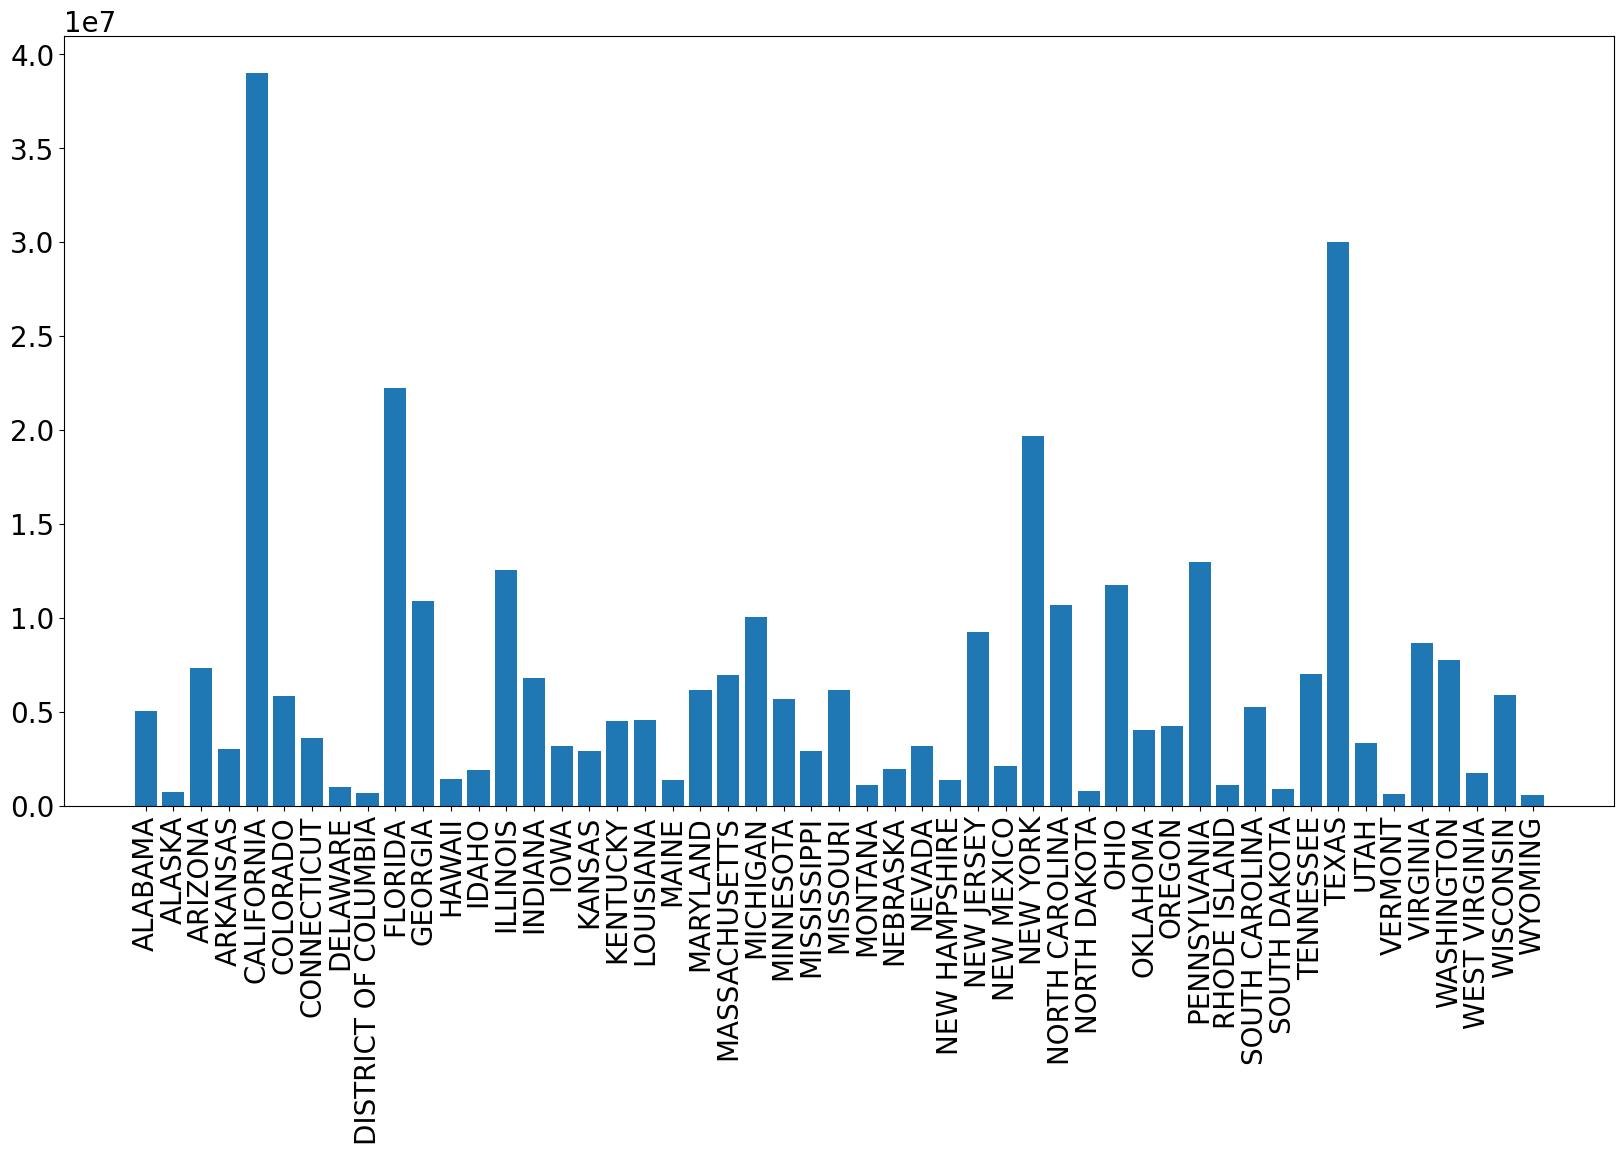

In [21]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = '20'
plt.xticks(rotation = 'vertical')
plt.bar(population_ds['STATE'],
        population_ds['POPULATION'])

<BarContainer object of 56 artists>

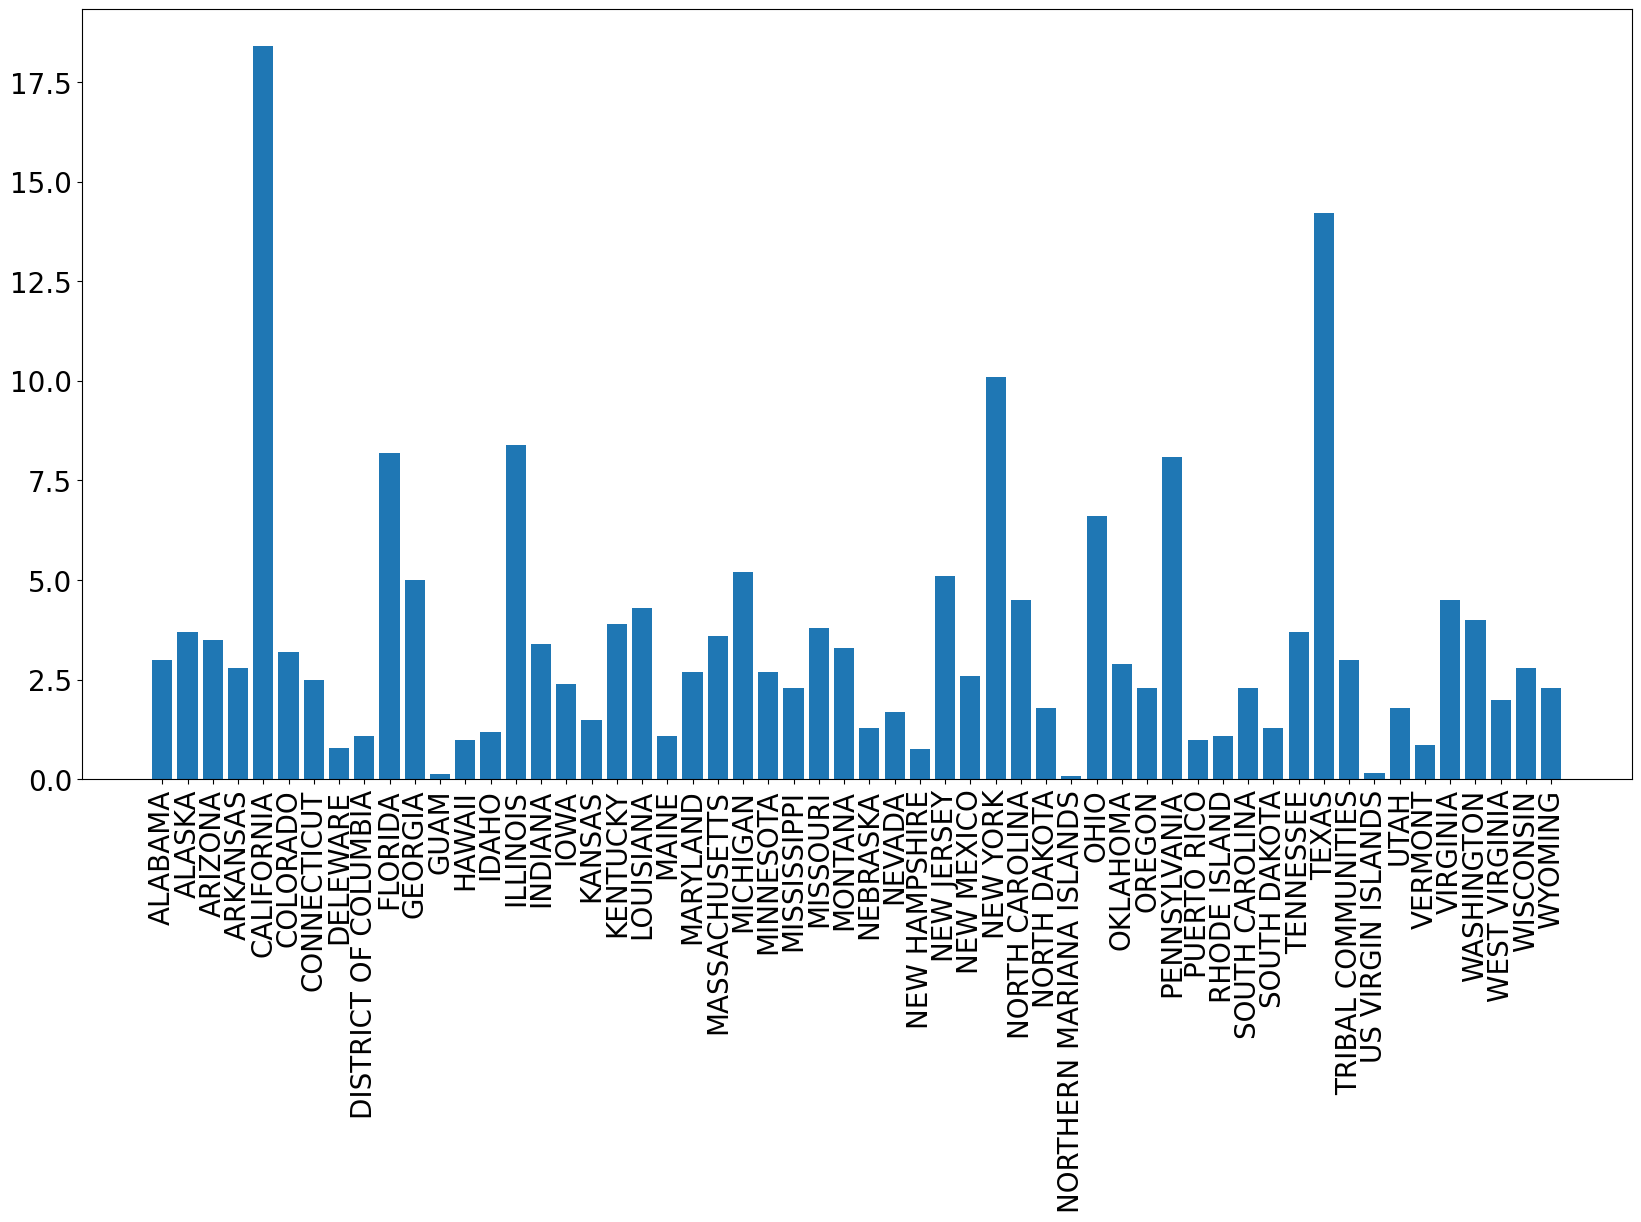

In [25]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = '20'
plt.xticks(rotation = 'vertical')
plt.bar(funding_ds['STATE'],
        funding_ds['FUNDING'])